In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [100]:
groups = pd.read_csv("/content/2022_world_cup_groups.csv")
world_cup_mtches_1 = pd.read_csv("/content/2022_world_cup_matches.csv")
data_dictionary = pd.read_csv("/content/data_dictionary.csv")
world_cup_mtches_2 = pd.read_csv("/content/international_matches.csv")
world_cups = pd.read_csv("/content/world_cup_matches.csv")

In [101]:
squads = pd.read_csv("/content/2022_world_cup_squads.csv", encoding= 'ISO-8859-1', low_memory=False)

In [102]:
data_dictionary

,Table,Field,Description
0,world_cups,Year,Year in which the World Cup took place
1,world_cups,Host Country,Country that hosted the tournament
2,world_cups,Winner,Country that won the tournament
3,world_cups,Runners-Up,Country that received second place
4,world_cups,Third,Country that received third place
5,world_cups,Fourth,Country that received fourth place
6,world_cups,Goals Scored,Total number of goals scored in the tournament
7,world_cups,Qualified Teams,Total number of teams that participated in the...
8,world_cups,Matches Played,Total number of matches played in the tournament
9,world_cup_groups,Group,Group for the first stage of the tournament (c...


In [103]:
squads

,ID,Team,Position,Player,Age,Caps,Goals,WC Goals,League,Club
0,1,Ecuador,Goalkeeper,Hernán Galíndez,35,12,0,0,Ecuador,Aucas
1,2,Ecuador,Defender,Félix Torres,25,17,2,0,Mexico,Santos Laguna
2,3,Ecuador,Defender,Piero Hincapié,20,21,1,0,Germany,Bayer Leverkusen
3,4,Ecuador,Defender,Robert Arboleda,31,33,2,0,Brazil,São Paulo
4,5,Ecuador,Midfielder,José Cifuentes,23,11,0,0,United States,Los Angeles FC
...,...,...,...,...,...,...,...,...,...,...
826,827,Uruguay,Defender,Martín Cáceres,35,115,4,0,United States,LA Galaxy
827,828,Uruguay,Goalkeeper,Sergio Rochet,29,8,0,0,Uruguay,Nacional
828,829,Uruguay,Midfielder,Agustín Canobbio,24,3,0,0,Brazil,Athletico Paranaense
829,830,Uruguay,Midfielder,Manuel Ugarte,21,6,0,0,Portugal,Sporting CP


In [104]:
squads_morocco = squads[squads['Team'] == 'Morocco']
del squads_morocco['Team'], squads_morocco['Club'], squads_morocco['League'], squads_morocco['WC Goals']
squads_morocco.set_index('ID', inplace=True)

In [105]:
squads_morocco

,Position,Player,Age,Caps,Goals
ID,,,,,
598,Goalkeeper,Yassine Bounou,31,45,0
599,Defender,Achraf Hakimi,24,53,8
600,Defender,Noussair Mazraoui,25,14,2
601,Midfielder,Sofyan Amrabat,26,38,0
602,Defender,Nayef Aguerd,26,21,1
603,Defender,Romain Saïss (captain),32,65,1
604,Midfielder,Hakim Ziyech,29,42,17
605,Midfielder,Azzedine Ounahi,22,9,2
606,Forward,Abderrazak Hamdallah,31,17,6


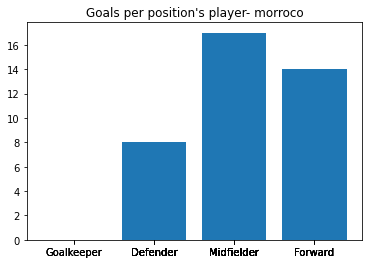

In [106]:
# Create bars
plt.bar(squads_morocco['Position'], squads_morocco['Goals'])

# Create names on the x-axis
plt.xticks(squads_morocco['Position'])
plt.title("Goals per position's player- morroco")
# Show graphic
plt.show()

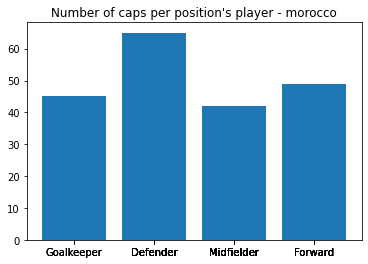

In [107]:
# Create bars
plt.bar(squads_morocco['Position'], squads_morocco['Caps'])

# Create names on the x-axis
plt.xticks(squads_morocco['Position'])
plt.title("Number of caps per position's player - morocco")
# Show graphic
plt.show()

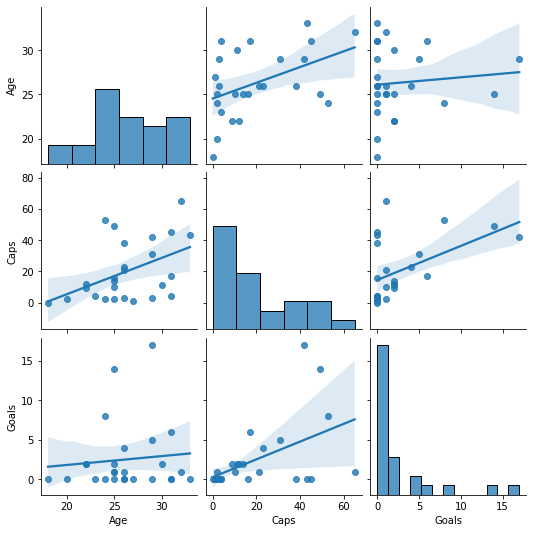

In [108]:
sns.pairplot(squads_morocco, kind="reg")
plt.show()

In [109]:
squads_croatia = squads[squads['Team'] == 'Croatia']
del squads_croatia['Team'], squads_croatia['Club'], squads_croatia['League'], squads_croatia['WC Goals']
squads_croatia.set_index('ID', inplace=True)

In [110]:
squads_croatia

,Position,Player,Age,Caps,Goals
ID,,,,,
572,Goalkeeper,Dominik Livakovi?,27,34,0
573,Defender,Josip Stanii?,22,7,0
574,Defender,Borna Barii?,30,28,1
575,Forward,Ivan Perii?,33,116,32
576,Defender,Martin Erli?,24,4,0
577,Defender,Dejan Lovren,33,72,5
578,Midfielder,Lovro Majer,24,11,3
579,Midfielder,Mateo Kova?i?,28,84,3
580,Forward,Andrej Kramari?,31,74,20


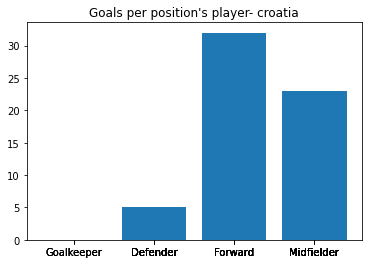

In [111]:
# Create bars
plt.bar(squads_croatia['Position'], squads_croatia['Goals'])

# Create names on the x-axis
plt.xticks(squads_croatia['Position'])
plt.title("Goals per position's player- croatia")
# Show graphic
plt.show()

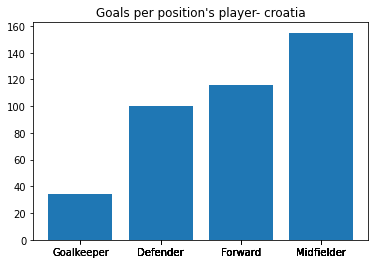

In [112]:
# Create bars
plt.bar(squads_croatia['Position'], squads_croatia['Caps'])

# Create names on the x-axis
plt.xticks(squads_croatia['Position'])
plt.title("Goals per position's player- croatia")
# Show graphic
plt.show()

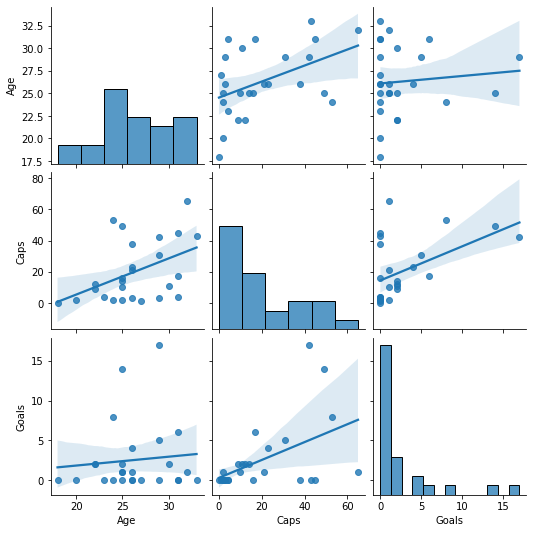

In [113]:
sns.pairplot(squads_morocco, kind="reg")
plt.show()

In [114]:
world_cup_mtches_1_morocco = world_cup_mtches_1[world_cup_mtches_1['Home Team']=='Morocco']

In [115]:
world_cup_mtches_1_morocco

,ID,Year,Date,Stage,Home Team,Away Team,Host Team
11,12,2022,2022-11-23,Group stage,Morocco,Croatia,False


In [116]:
world_cup_mtches_2_morocco = world_cup_mtches_2[world_cup_mtches_2['Home Team']=='Morocco']

In [117]:
world_cup_mtches_2_morocco

,ID,Tournament,Date,Home Team,Home Goals,Away Goals,Away Team,Win Conditions,Home Stadium
2448,2449,Friendly,1958-04-03,Morocco,3,1,Libya,NaN,True
2605,2606,Friendly,1960-01-01,Morocco,0,5,Yugoslavia,NaN,True
2716,2717,FIFA World Cup qualification,1960-10-30,Morocco,2,1,Tunisia,NaN,True
2731,2732,Friendly,1960-12-11,Morocco,2,3,German DR,NaN,True
2736,2737,FIFA World Cup qualification,1961-02-22,Morocco,1,1,Tunisia,NaN,False
...,...,...,...,...,...,...,...,...,...
17552,17553,African Cup of Nations,2022-01-25,Morocco,2,1,Malawi,NaN,False
17619,17620,FIFA World Cup qualification,2022-03-29,Morocco,4,1,DR Congo,NaN,True
17687,17688,African Cup of Nations qualification,2022-06-09,Morocco,2,1,South Africa,NaN,True
17711,17712,African Cup of Nations qualification,2022-06-13,Morocco,2,0,Liberia,NaN,True


In [118]:
world_cup_mtches_2_morocco.set_index('ID', inplace = True)

In [119]:
world_cup_mtches_2_morocco = world_cup_mtches_2_morocco[world_cup_mtches_2_morocco['Away Team']=='Croatia']

In [120]:
world_cup_mtches_2_morocco

,Tournament,Date,Home Team,Home Goals,Away Goals,Away Team,Win Conditions,Home Stadium
ID,,,,,,,,
9493,King Hassan II Tournament,1996-12-11,Morocco,2,2,Croatia,Croatia win on penalties,True
